Text(0,0.5,'loss')

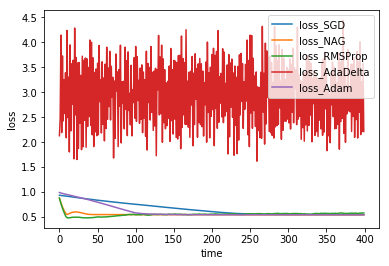

In [25]:
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

#获取数据集
X_train,y_train= load_svmlight_file("H:\\datasets\\a9a.txt")
X_test,y_test=load_svmlight_file("H:\\datasets\\a9at.txt",n_features=123)
X_train=X_train.toarray()
s=X_train.shape[0]
X_test=X_test.toarray()
s_test=X_test.shape[0]
M=np.ones([s,])
X_train=np.c_[X_train,M]
M_test=np.ones([s_test,])
X_test=np.c_[X_test,M_test]

J=J1=J2=J3=J4=np.zeros([124,])

namda=0
learning_rate=0.03
times=400

threshold=-0.8
loss_SGD=np.zeros([times])
loss_NGA=np.zeros([times])
loss_RMS=np.zeros([times])
loss_AdaDelta=np.zeros([times])

for n in range(times):
    Z=[random.randint(0,s-1)for _ in range(128)]
    
    gra=0
    for i in Z:
        if 1-y_train[i]*(J.T.dot(X_train[i]))>=0:
            gra=gra+J-X_train[i]*y_train[i]
        else:
            gra=gra+J
            
    gra=gra/len(Z)
    
    J=J-learning_rate*gra
    test_sum=0
    
    hit=0
    for i in range(s_test):
        test_sum+=max(0,1-y_test[i]*J.T.dot(X_test[i]))
        if (J.dot(X_test[i]) >= threshold and y_test[i] == 1) or (J.dot(X_test[i]) < threshold and y_test[i] == -1):
            hit+=1
        SGD_rate=hit/s_test
        
    loss_SGD[n]=0.5*J.T.dot(J)+1/s_test*test_sum


    

    gra=0
    NAG=0.9
    for i in Z:
        if 1-y_train[i]*(J1.T.dot(X_train[i])) >= 0:
            gra=gra+J1-X_train[i]*y_train[i]
        else:
            gra=gra+J1
   
    gra=gra/len(Z)
    namda_before=namda
    namda=NAG*namda-learning_rate*gra
    J1=J1-NAG*namda_before+(1+NAG)*namda
    test_sum=0
    
    hit=0
    for i in range(s_test):
        test_sum+=max(0,1-y_test[i]*J1.T.dot(X_test[i]))
        if (J1.dot(X_test[i])>=threshold and y_test[i]==1) or (J1.dot(X_test[i]) < threshold and y_test[i]==-1):
            hit+=1
    
    NAG_rate=hit/s_test
    
    loss_NAG[n]=0.5*J1.T.dot(J1)+1/s_test*test_sum
    
    
    derta=0.9
    epis=1e-8
    learning_rate=0.001
    gra=0
    P1=0
    for i in Z:
        if 1-y_train[i]*(J2.T.dot(X_train[i])) >=0:
            gra=gra+J2-X_train[i]*y_train[i]
        else:
            gra=gra+J2

        gra=gra/len(Z)
    P1= derta*P1+(1-derta)*gra*gra
    J2= J2-learning_rate*gra/np.sqrt(P1+epis)
    test_sum=0
    
    hit=0
    for i in range(s_test):
        test_sum+=max(0,1-y_test[i]*J1.T.dot(X_test[i]))
        if (J2.dot(X_test[i])>=threshold and y_test[i]==1) or (J2.dot(X_test[i]) < threshold and y_test[i]==-1):
            hit+=1
            
    RMS_rate=hit/s_test
    
    loss_RMS[n] = 0.5*J2.T.dot(J2) + 1/s_test*test_sum
    
    derta=0.95
    delta=0
    P2=0
    eps=1e-6
    gra=0
    for i in Z:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(J3.T.dot(X_train[i])) >= 0:
            gra=gra+J3-X_train[i]*y_train[i]
        else:
            gra=gra+J3
    gra=gra/len(Z)
    
    p2 = derta*P2 + (1-derta)*gra*gra
    deltaJ = -np.sqrt((delta+eps)/(P2+eps))*gra
    J3=J3+deltaJ
    delta=derta*delta+(1-derta)*deltaJ*deltaJ
    test_sum = 0

    hit = 0
    for i in range(s_test):
        test_sum += max(0,1-y_test[i]*J3.T.dot(X_test[i]))
        if (J3.dot(X_test[i]) >= threshold and y_test[i] == 1) or (J3.dot(X_test[i]) < threshold and y_test[i] == -1):
            hit+=1

    AdaDelta_rate= hit/s_test
    
    loss_AdaDelta[n] = 0.5*J3.T.dot(J3) + 1/s_test*test_sum

    derta=0.999
    beta=0.9
    eps=1e-8
    meta=0
    P3=0
    gra=0
    for i in Z:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(J4.T.dot(X_train[i])) >= 0:
            gra=gra+J4-X_train[i]*y_train[i]
        else:
            gra=gra+J4
    #取平均值
    gra=gra/len(Z)
    meta=beta*meta+(1-beta)*gra
    P3=derta*P3 + (1-derta)*gra*gra
    alpha = learning_rate*np.sqrt(1-derta**(n+1))/(1-beta**(n+1))
    J4 = J4-alpha*meta/np.sqrt(P3+eps)
    test_sum = 0
    #命中数
    hit = 0
    for i in range(s_test):
        test_sum+= max(0,1-y_test[i]*J4.T.dot(X_test[i]))
        if (J4.dot(X_test[i]) >= threshold and y_test[i] == 1) or (J4.dot(X_test[i]) < threshold and y_test[i] == -1):
            hit += 1
    #训练集准确率
    Adam_rate = hit/s_test
    #计算Adam loss
    loss_Adam[n] = 0.5*J4.T.dot(J4) + 1/s_test*test_sum

n = np.arange(times)
plt.plot(n,loss_SGD[n],label='loss_SGD')
plt.plot(n,loss_NAG[n],label='loss_NAG')
plt.plot(n,loss_RMS[n],label='loss_RMSProp')
plt.plot(n,loss_AdaDelta[n],label='loss_AdaDelta')
plt.plot(n,loss_Adam[n],label='loss_Adam')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')